<a href="https://colab.research.google.com/github/Pranav-Redij/Projects/blob/main/Smart_Laundary_System_(using_CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalize
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

In [4]:
# Train/val split
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('float64')

In [7]:
len(X_valid)

5000

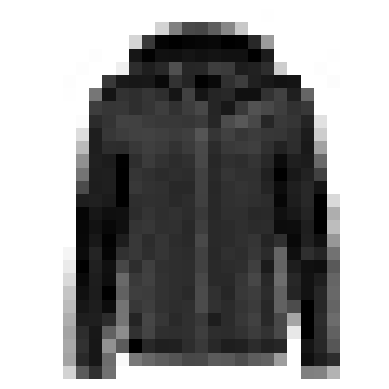

In [10]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [11]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [12]:
len(y_train)

55000

In [13]:
y_train[0]

np.uint8(4)

In [14]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [15]:
class_names[y_train[0]]

'Coat'

In [16]:
X_valid.shape

(5000, 28, 28)

In [17]:
X_test.shape

(10000, 28, 28)

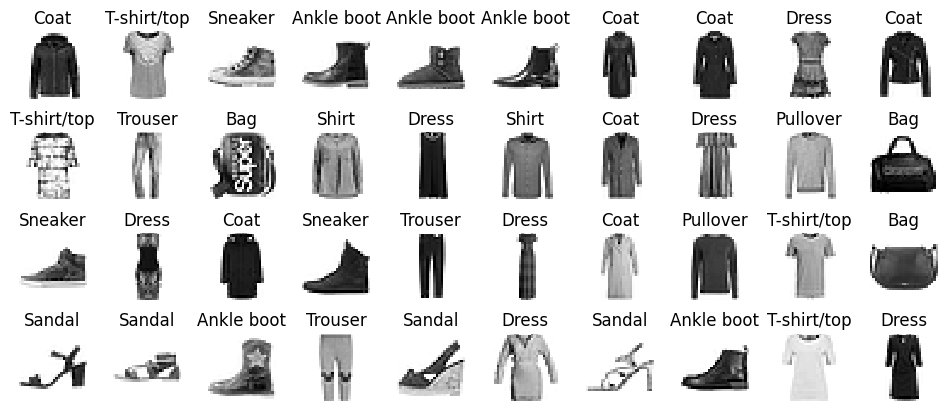

In [18]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [19]:
model = keras.models.Sequential([
    keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    keras.layers.Conv2D(32, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [21]:
model.layers

[<Reshape name=reshape, built=True>,
 <Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>]

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

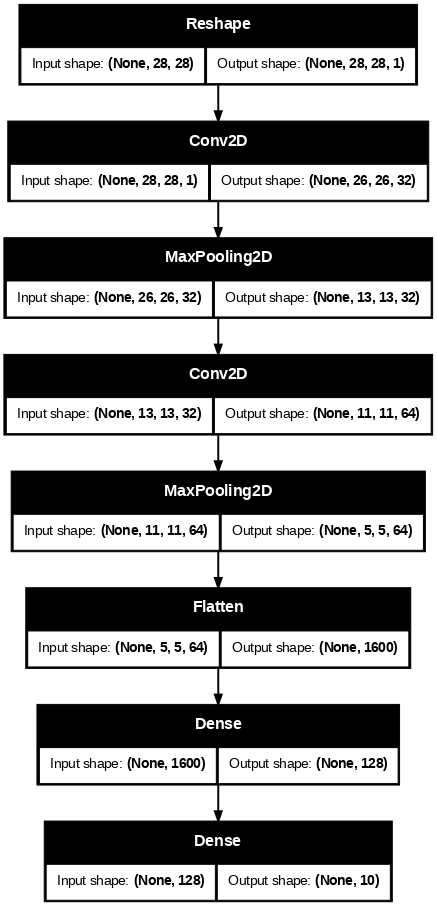

In [23]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True , dpi=70)

In [24]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 61s 34ms/step - accuracy: 0.7683 - loss: 0.6319 - val_accuracy: 0.8816 - val_loss: 0.3271
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 56s 33ms/step - accuracy: 0.8811 - loss: 0.3259 - val_accuracy: 0.8992 - val_loss: 0.2776
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.9008 - loss: 0.2744 - val_accuracy: 0.9036 - val_loss: 0.2541
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.9125 - loss: 0.2377 - val_accuracy: 0.9102 - val_loss: 0.2460
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9234 - loss: 0.2069 - val_accuracy: 0.9084 - val_loss: 0.2525
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9331 - loss: 0.1805 - val_accuracy: 0.9068 - val_loss: 0.2638
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.9423 - loss: 0.1575 - val_accuracy: 0.9096 - val_loss: 0.2700
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 84s 32ms/step - accuracy: 0.9494 -

In [25]:
history.params

{'verbose': 'auto', 'epochs': 10, 'steps': 1719}

In [26]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [27]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

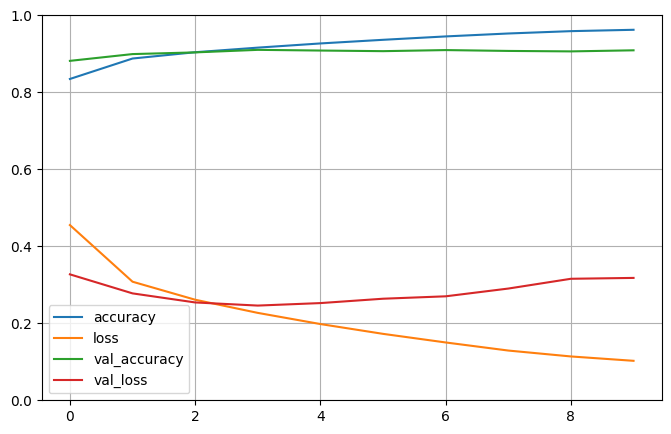

In [28]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [29]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9003 - loss: 0.3366


[0.33028167486190796, 0.9057999849319458]

In [30]:
from google.colab import files
from PIL import Image
import numpy as np

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

uploaded = files.upload()
filename = list(uploaded.keys())[0]
img = Image.open(filename).convert("L").resize((28, 28))

img_array = np.array(img) / 255.0
img_input = img_array.reshape(1, 28, 28, 1)

predictions = model.predict(img_input)
for i, prob in enumerate(predictions[0]):
    print(f"{class_names[i]}: {prob * 100:.2f}")

Saving Screenshot 2025-04-11 at 4.35.43 PM.png to Screenshot 2025-04-11 at 4.35.43 PM.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
T-shirt/top: 0.04
Trouser: 0.00
Pullover: 53.70
Dress: 0.00
Coat: 0.00
Sandal: 0.00
Shirt: 0.01
Sneaker: 0.00
Bag: 46.26
Ankle boot: 0.00


In [31]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.3 MB/s eta 0:00:00


# **INTERFACE CODE**

In [36]:
import gradio as gr
from PIL import Image
import numpy as np

# Class labels
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Laundry instructions
laundry_instructions = {
    "T-shirt/top": "Machine wash cold, tumble dry low.",
    "Trouser": "Wash separately, use mild detergent.",
    "Pullover": "Hand wash recommended, lay flat to dry.",
    "Dress": "Dry clean only.",
    "Coat": "Dry clean only, do not bleach.",
    "Sandal": "Wipe with a damp cloth only.",
    "Shirt": "Machine wash warm, iron on medium heat.",
    "Sneaker": "Remove laces, wash gently with soap and water.",
    "Bag": "Spot clean with damp cloth, avoid soaking.",
    "Ankle boot": "Do not wash. Use brush or damp cloth to clean."
}

# Prediction function
def predict(image):
    try:
        img = image.convert("L").resize((28, 28))
        img_array = np.array(img) / 255.0
        img_input = img_array.reshape(1, 28, 28, 1)
        predictions = model.predict(img_input)
        pred_index = np.argmax(predictions[0])
        pred_label = class_names[pred_index]
        instruction = laundry_instructions[pred_label]
        return f"🧾 Predicted: {pred_label}\n\n🧺 Care Instructions:\n{instruction}"
    except Exception as e:
        return f"Error: {str(e)}"

# Interface with custom CSS
css = """
#big-output textarea {
  font-size: 22px !important;
  line-height: 1.6;
}
"""

interface = gr.Interface(
    fn=predict,
    inputs=gr.Image(type="pil", label="Upload 28x28 grayscale image"),
    outputs=gr.Textbox(label="Prediction + Care Instructions", elem_id="big-output", lines=5),
    title="Smart Laundry System \n 🧥👞👜💼👒🧦🧤🧣👒👟👘👕🩳👔  ",
    description="Upload a grayscale 28x28 image and get prediction with care instructions.",
    css=css
)

interface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c6b72735ceb91164de.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
